In [1]:
# We are trying to replicate the clustering of different steel types as found in the paper below:
# https://link.springer.com/article/10.1186%2F2193-9772-3-8 (Figure 2)

# Load in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [34]:
# Load in the data
raw_data = np.loadtxt(open("40192_2013_16_MOESM1_ESM..csv", "r"), delimiter = ',', dtype = str, skiprows = 0)

# Get the labels
labels = raw_data[0]

# Create a dataframe
df = pd.DataFrame(raw_data[1:], columns = labels)

# Drop Sl. No. since it is just an indexing column
df = df.drop(["Sl. No."], axis = 1)

# Convert the columns to floating points
df.iloc[:,:] = df.iloc[:,:].apply(pd.to_numeric)

df.head()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,885.0,30.0,0.0,0.0,30.0,0.0,30.0,0.0,30.0,30.0,...,0.022,0.01,0.02,0.01,0.0,825.0,0.07,0.02,0.04,232.0
1,885.0,30.0,0.0,0.0,30.0,0.0,30.0,0.0,30.0,30.0,...,0.017,0.08,0.12,0.08,0.0,610.0,0.11,0.00,0.04,235.0
2,885.0,30.0,0.0,0.0,30.0,0.0,30.0,0.0,30.0,30.0,...,0.015,0.02,0.03,0.01,0.0,1270.0,0.07,0.02,0.00,235.0
3,885.0,30.0,0.0,0.0,30.0,0.0,30.0,0.0,30.0,30.0,...,0.024,0.01,0.02,0.01,0.0,1740.0,0.06,0.00,0.00,241.0
4,885.0,30.0,0.0,0.0,30.0,0.0,30.0,0.0,30.0,30.0,...,0.022,0.01,0.02,0.02,0.0,825.0,0.04,0.02,0.00,225.0


In [23]:
data = scale(df.values)
n_groups = 3
labels = df.iloc[:,0]

In [24]:
# Run the model
reduced_data = PCA(n_components = 2).fit_transform(data)
kmeans = KMeans(init = 'k-means++', n_clusters = n_groups, n_init = 10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

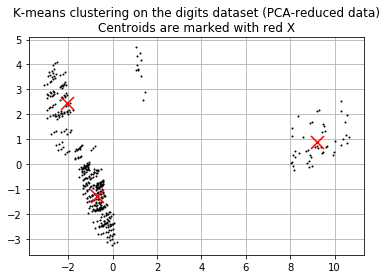

In [25]:
# Plot
plt.figure(1)
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)
plt.grid()
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with red X')
plt.show()

In [ ]:
# Example from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

print(len(labels))

In [ ]:
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters = n_groups, n_init=10),
              name="k-means++", data=data)

In [ ]:
# Just the model
KMeans(init='k-means++', n_clusters = n_groups, n_init=10).fit(data)

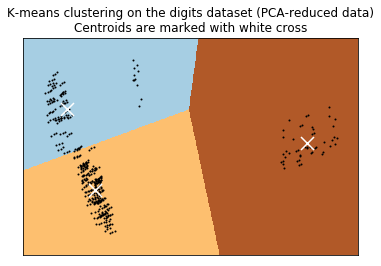

In [7]:
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_groups, n_init=10)
kmeans.fit(reduced_data)


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()